In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import random
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('cleaned_arythmia.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,269,270,271,272,273,275,276,277,278,279
0,0,75,0,190,80,91,193,371,174,121,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,1,56,1,165,64,81,174,401,149,39,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,2,54,0,172,95,138,163,386,185,102,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,3,55,0,175,94,100,202,380,179,143,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,4,75,0,190,80,88,181,360,177,103,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,53,1,160,70,80,199,382,154,117,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,1
448,448,37,0,190,85,100,137,361,201,73,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,10
449,449,36,0,166,68,108,176,365,194,116,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,2
450,450,32,1,155,55,93,106,386,218,63,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,1


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
X = X.drop(columns = ['Unnamed: 0'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,62.9,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,48.2,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,68.0,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,48.9,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-0.6,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,82.5,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,-63.6,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,61.0,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit(X)
X_norm = scaler.transform(X)
X_norm_df = pd.DataFrame(X_norm)
X_norm_df

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.000000,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

## Phase 1

#### Input: Feature Set F = (f1, f2, f3, ...., fD). Class Labels y.
#### Output: Strong releveant features

In [7]:
import math

def entropy(values):
    probabilities = [float(values.count(value)) / len(values) for value in set(values)]
    return - sum([p * math.log2(p) for p in probabilities])

def joint_entropy(X, Y):
    XY = list(zip(X, Y))
    return entropy(XY)

def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

def symmetric_uncertainty(X, Y):
    HX = entropy(X)
    HY = entropy(Y)
    HXY = joint_entropy(X, Y)
    HX_given_Y = conditional_entropy(X, Y)
    return (2 * HX - HX_given_Y) / (HX + HY)

In [8]:
F_strong = list()
score_list =[]
for itr, col in enumerate(X_norm_df.columns):
    score = symmetric_uncertainty(X_norm_df[col].tolist(), y.tolist())
    F_strong.append((col, score))
    score_list.append(score)

before = len(F_strong)
print(f"Number of features currently = {before}")

Number of features currently = 261


In [9]:
Su_max= max(score_list)
print(f"Su_max = {Su_max}")

D = len(X_norm_df.columns)
SU_D = D / math.log2(D)
SU_D = round(SU_D)
print(f"SU_D = {SU_D}, F_score of SU_D = {F_strong[SU_D][1]}")
rho= min(0.1* Su_max,F_strong[SU_D][1])

for t in F_strong:
    if t[1] < rho:
        F_strong.remove(t)

after = len(F_strong)
print(f"Number of features currently = {after}")

Su_max = 0.9846326225018346
SU_D = 33, F_score of SU_D = 0.012446014298881623
Number of features currently = 253


In [10]:
F_strong.sort(key=lambda a: a[1], reverse = True)
F_strong

[(242, 0.9846326225018346),
 (232, 0.9817220243235594),
 (222, 0.9743042298753847),
 (231, 0.9728459800539476),
 (251, 0.9720234490522455),
 (241, 0.9675760191046237),
 (260, 0.9649192115655392),
 (173, 0.9626979697103548),
 (163, 0.9625261755724288),
 (202, 0.9603176613948422),
 (212, 0.9595923414375362),
 (221, 0.9580648992309221),
 (250, 0.9576883549187081),
 (153, 0.9567637089210954),
 (172, 0.9557237411289891),
 (192, 0.9524982648774347),
 (152, 0.9507663267158687),
 (211, 0.9502326180481592),
 (259, 0.9482538890572332),
 (201, 0.9465652762950377),
 (183, 0.9456870084734529),
 (162, 0.9453878959055964),
 (191, 0.944150374118514),
 (182, 0.9380073436267944),
 (235, 0.9168062689169544),
 (226, 0.9102910670022737),
 (10, 0.9066769582733419),
 (11, 0.9066769582733419),
 (12, 0.9066769582733419),
 (13, 0.9066769582733419),
 (245, 0.9019704312012031),
 (225, 0.8988637945245587),
 (9, 0.8969246291647056),
 (216, 0.8943460407273535),
 (236, 0.8841555011515222),
 (6, 0.877704905712518),
 (

## Phase 2
#### Input: F_strong
#### Output: M Feature Clusters

In [11]:
U0 = F_strong.copy()
clusters = dict()
k = 1
dt_max = U0[0][1] - U0[-1][1]
D_star = len(U0)
rho1 = (dt_max*math.log2(D_star))/D_star
print(f"rho1 = {rho1}")

rho1 = 0.030747457812084007


In [12]:
while True:
    U1 = U0.copy()
    clusters[k] = list()
    clusters[k].append(U0[0])
    # print(clusters)
    
    #removing clusters having weak correlation with the top feature(f1) in U1
    for i in range(1, len(U1)):
        difference = U0[0][1] - U0[i][1]
        if difference > rho1:
            U1.remove(U0[i])
    
    #Finding similar features to f1(to-feature) and storing them to the cluster-K
    for i in range(1, len(U1)):
        if symmetric_uncertainty(X_norm_df[U1[0][0]].tolist(), X_norm_df[U1[i][0]].tolist()) >= min(U1[0][1], U1[i][1]):
            clusters[k].append(U1[i])
    
    #updating the U0
    for values in clusters[k]:
        U0.remove(values)
    
    #checking the stopping criteria
    if len(U0) > 1:
        k += 1
    else:
        break

In [13]:
clusters

{1: [(242, 0.9846326225018346),
  (222, 0.9743042298753847),
  (231, 0.9728459800539476),
  (251, 0.9720234490522455),
  (241, 0.9675760191046237),
  (260, 0.9649192115655392),
  (173, 0.9626979697103548),
  (163, 0.9625261755724288),
  (202, 0.9603176613948422),
  (212, 0.9595923414375362),
  (221, 0.9580648992309221),
  (250, 0.9576883549187081),
  (153, 0.9567637089210954),
  (172, 0.9557237411289891)],
 2: [(232, 0.9817220243235594), (192, 0.9524982648774347)],
 3: [(152, 0.9507663267158687), (182, 0.9380073436267944)],
 4: [(211, 0.9502326180481592),
  (201, 0.9465652762950377),
  (183, 0.9456870084734529),
  (162, 0.9453878959055964),
  (191, 0.944150374118514)],
 5: [(259, 0.9482538890572332)],
 6: [(235, 0.9168062689169544),
  (225, 0.8988637945245587),
  (9, 0.8969246291647056),
  (216, 0.8943460407273535)],
 7: [(226, 0.9102910670022737), (236, 0.8841555011515222)],
 8: [(10, 0.9066769582733419),
  (11, 0.9066769582733419),
  (12, 0.9066769582733419),
  (13, 0.906676958273341

## Phase 3

In [14]:
swarm_size = 25

# Initalizaing the swarm
# Input: M feature clusters
# Output: N particles 

#selected probability for each cluster
max_list = list()
for values in clusters.values():
    max_list.append(values[0][1])
probabilities = list()
for values in max_list:
    probabilities.append(values/max_list[0])

M = len(list(clusters.keys()))
particles = np.zeros((swarm_size, M))
for i in range(swarm_size):
    for j in range(M):
        if random.uniform(0, 1) < probabilities[i]:
            index = random.randint(0, len(clusters[j+1])-1)
            particles[i][j] = index
        else:
            particles[i][j] = 0

print(particles)

[[ 3.  1.  0. ...  4. 16. 19.]
 [13.  1.  1. ...  0.  5. 39.]
 [ 3.  0.  1. ...  4. 32. 15.]
 ...
 [ 6.  0.  1. ...  3. 19.  0.]
 [ 0.  1.  0. ...  5.  0.  0.]
 [ 3.  0.  1. ...  0. 34. 18.]]


In [15]:
def fitness_function(position):
    selected_features = list()
    for itr, pos in enumerate(position):
        selected_features.append(clusters[itr+1][int(pos)][0])
    #print(len(selected_features))
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    clf = RandomForestClassifier()
    clf.fit(X_train_selected, y_train)
    accuracy = clf.score(X_test_selected, y_test)
    return accuracy

In [16]:
M = len(clusters)
Pbest = np.zeros((swarm_size, M))

for i in range(swarm_size):
    if fitness_function(particles[i]) > fitness_function(Pbest[i]):
        Pbest[i] = particles[i]

In [17]:
Pbest

array([[ 3.,  1.,  0., ...,  4., 16., 19.],
       [13.,  1.,  1., ...,  0.,  5., 39.],
       [ 3.,  0.,  1., ...,  4., 32., 15.],
       ...,
       [ 6.,  0.,  1., ...,  3., 19.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
Gbest = np.zeros((1, M))
for i in range(swarm_size):
    if fitness_function(Pbest[i]) > fitness_function(Gbest[0]):
        Gbest[0] = Pbest[i]

In [19]:
Gbest

array([[ 4.,  1.,  0.,  3.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  1.,  4.,  0.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,
         4.,  1., 34.]])

In [20]:
for i in range(swarm_size):
    #Calculate pm
    temp_sum = 0
    for j in range(M):
        if Pbest[i][j] == Gbest[0][j]:
            temp_sum += 1
    pm = 0.1 * (temp_sum/M)
    
    #Update
    for j in range(M):
        sum1 = Pbest[i][j] + Gbest[0][j]
        first_half = math.ceil(sum1/2)
        abs_diff = abs(Pbest[i][j] - Gbest[0][j])
        gauss = abs(np.random.normal(loc = 0, scale = 1))
        second_half = np.ceil(gauss*abs_diff)
        final = first_half + second_half
        #print(final)
        if random.uniform(0, 1) > pm:
            if final < len(clusters[j+1]):
                particles[i][j] = final
        else:
            particles[i][j] = Pbest[i][j]

In [21]:
final_features = list()
for itr, index in enumerate(Gbest[0]):
    if int(index) != 0:
        final_features.append(clusters[itr+1][int(index)][0])


In [27]:
after_algo = len(final_features)

In [23]:
X_train_selected = X_train[:, final_features]
X_test_selected = X_test[:, final_features]

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

RandomForestClassifier()

In [25]:
accuracy = clf.score(X_test_selected, y_test)
accuracy

0.6483516483516484

Text(0.5, 1.0, 'Feature Selection')

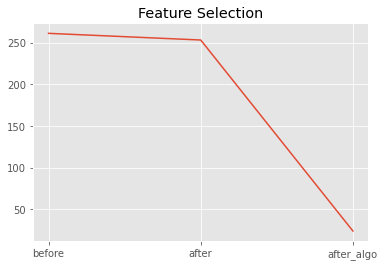

In [34]:
plt.plot(['before', 'after', 'after_algo'], [before, after, after_algo])
plt.title('Feature Selection')